## Meteo example

This is a presentation of the GFS meteo retrieval function

In [1]:
#to use the full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pyPoseidon.meteo import *

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import geoviews.feature as gf


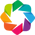

In [3]:
hv.notebook_extension('bokeh')

In [4]:
%matplotlib notebook

In [5]:
#define in a dictionary the properties of the model..
dic={'minlon':-35., # lat/lon window
     'maxlon':42.,
     'minlat':25.05,
     'maxlat':76.5,
     'start_date':'2013-10-28',
     'end_date':'2013-10-29',
    }

In [6]:
### retrieve UVP
meteo = gfs(**dic)


extracting meteo from https://bluehub.jrc.ec.europa.eu/erddap/griddap/NCEP_Global_Best

meteo done


In [7]:
# Data provenance is readily available by xarray
meteo.uvp

<xarray.Dataset>
Dimensions:    (latitude: 103, longitude: 154, time: 9, x: 103, y: 154)
Coordinates:
  * latitude   (latitude) float64 25.0 25.5 26.0 26.5 27.0 27.5 28.0 28.5 ...
  * time       (time) datetime64[ns] 2013-10-28 2013-10-28T03:00:00 ...
  * longitude  (longitude) float64 -35.0 -34.5 -34.0 -33.5 -33.0 -32.5 -32.0 ...
Dimensions without coordinates: x, y
Data variables:
    msl        (time, latitude, longitude) float64 1.023e+05 1.023e+05 ...
    u10        (time, latitude, longitude) float64 -9.46 -9.61 -9.74 -9.92 ...
    v10        (time, latitude, longitude) float64 -1.83 -1.87 -2.06 -2.35 ...
    lons       (x, y) float64 -35.0 -34.5 -34.0 -33.5 -33.0 -32.5 -32.0 ...
    lats       (x, y) float64 25.0 25.0 25.0 25.0 25.0 25.0 25.0 25.0 25.0 ...

<IPython.core.display.Javascript object>


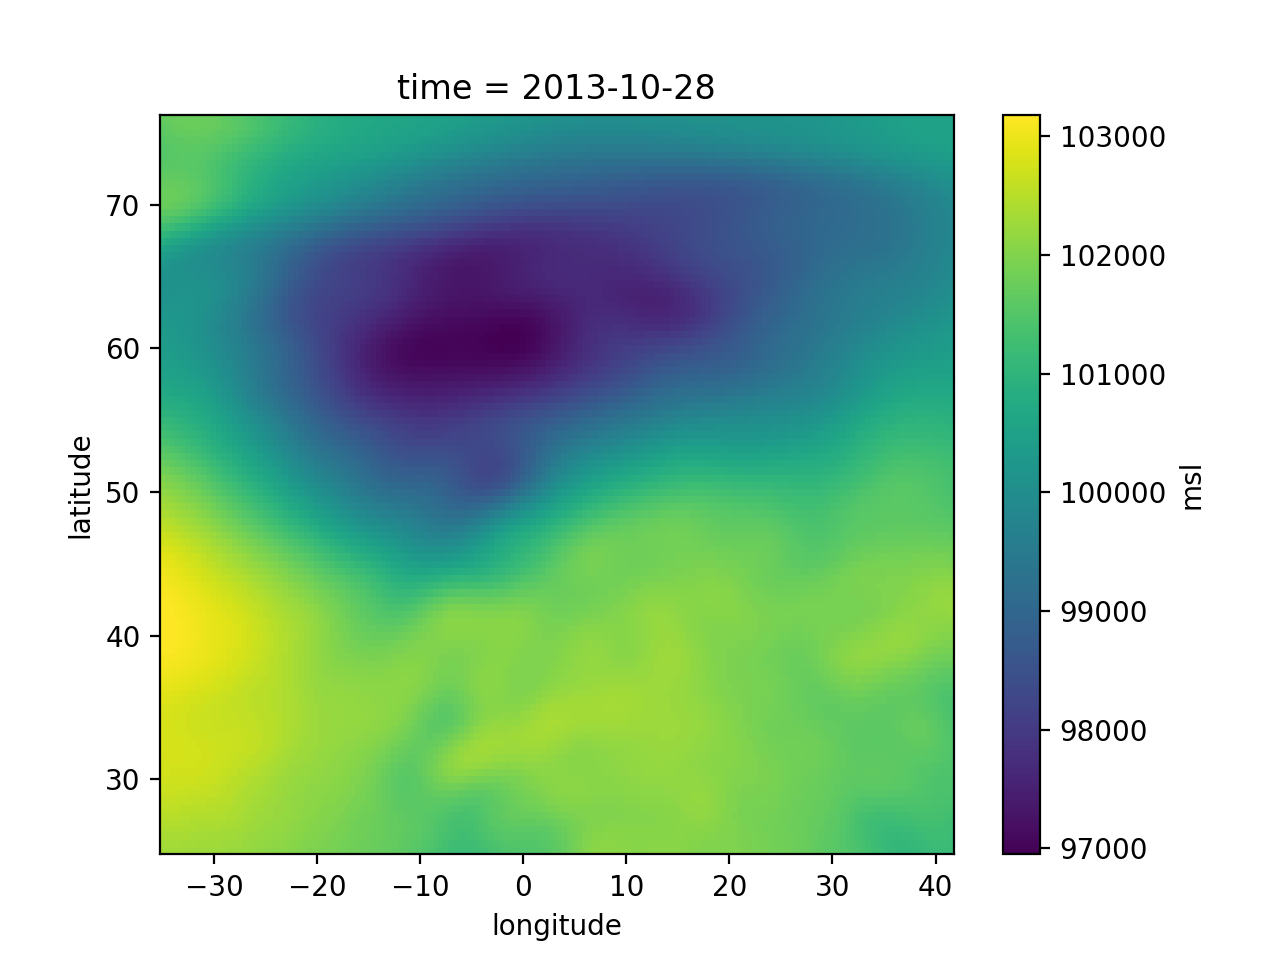

In [8]:
# simple frame plots
meteo.uvp.msl[0,:,:].plot()

<IPython.core.display.Javascript object>


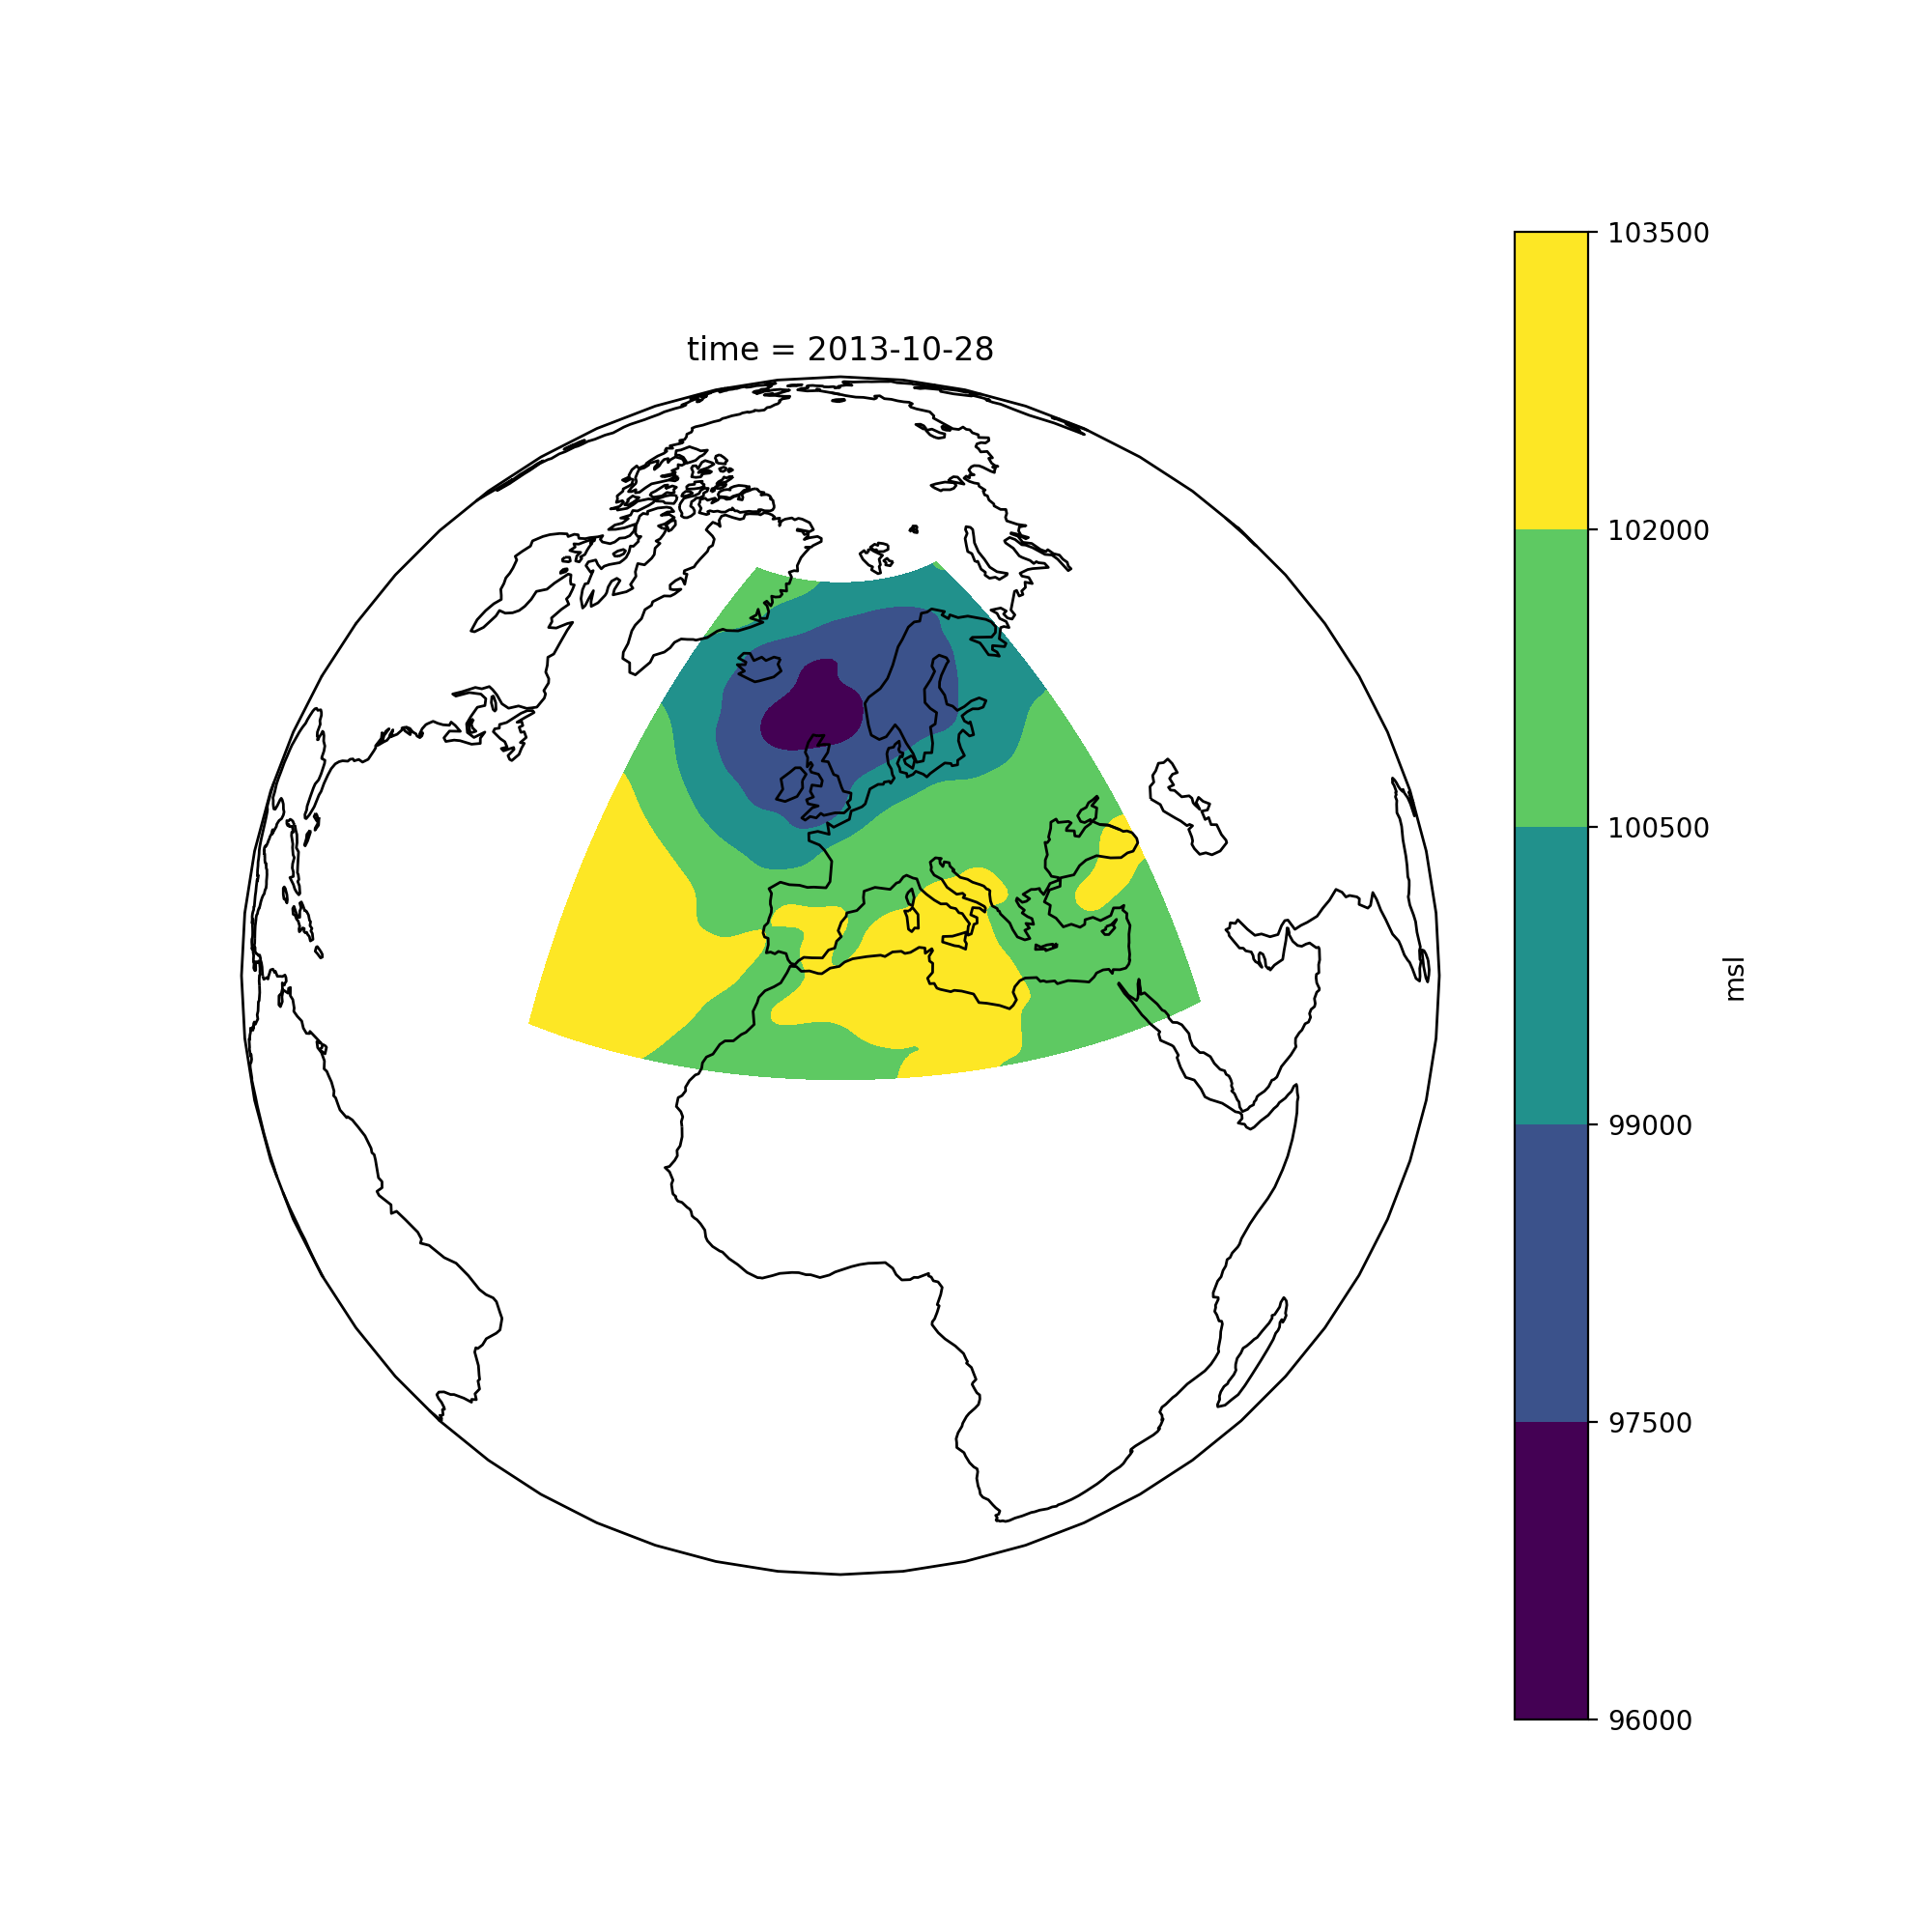

In [9]:
# using Cartopy we can project on the globe
fig, ax = plt.subplots(figsize=(10, 10))

ax = plt.axes(projection=ccrs.Orthographic(0, 35))

meteo.uvp.msl[0,:,:].plot.contourf(ax=ax, transform=ccrs.PlateCarree());

ax.set_global(); ax.coastlines();

### Holoviews

In [10]:
%%opts Image [width=650 height=450] (cmap='viridis')
meteo.hview.to(hv.Image, ['longitude','latitude'], 'msl').hist()

:AdjointLayout
   :HoloMap   [time]
      :Image   [longitude,latitude]   (msl)
   :HoloMap   [time]
      :Histogram   [msl]   (msl_frequency)

## Geoviews

In [10]:
g50 = gv.feature.coastline(plot=dict(scale='50m'), style=dict(linewidth=1.5))

In [11]:
%%opts Image [colorbar=True width=650 height=450 toolbar="above"  tools=['hover']] (cmap='viridis')
meteo.gview.to(gv.Image, ['longitude','latitude'], 'msl' , dynamic=True) * gf.coastline() * gf.borders()

:DynamicMap   [time]

## Write out

In [12]:
#save to netcdf
meteo.uvp.to_netcdf('./test/test.nc')

In [13]:
#save to DELFT3D format
meteo.output(solver='d3d',rpath='./test/')